<a href="https://colab.research.google.com/github/nuvita97/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nuvita97/Diabetes-Prediction.git

Cloning into 'Diabetes-Prediction'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [5]:
import os

path = "/content/Diabetes-Prediction"
os.chdir(path)
os.listdir()

['.git', 'README.md', 'diabetes.csv']

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

display(df.head())
print(df.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)


## Describe the data
Here we can see that there are 9 columns in the data. All columns seem to be numeric in nature which is good for modelling. In case of Character string columns, we could have used dummy numeric variables for modelling. The columns here are:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Outcome: Class variable (0 or 1).

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
allcols = list(set(df.columns) - set(["Outcome"]))
print("We need to find out the importance of these features: \n", allcols)

We need to find out the importance of these features: 
 ['Age', 'Pregnancies', 'BloodPressure', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness']


In [13]:
# Statistics about the percentage of 0 value in each column (except for Pregnancies)

missingcols = list(set(allcols) - set(["Pregnancies"]))
df[missingcols] = df[missingcols].replace(0, np.NaN)
df[missingcols].isnull().sum()/df.shape[0] * 100

Age                          0.000000
Glucose                      0.651042
BloodPressure                4.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
SkinThickness               29.557292
dtype: float64

In [14]:
# Impute missing values by Mean

df[missingcols] = df[missingcols].fillna(df[missingcols].mean())
df[missingcols].isnull().sum()/df.shape[0] * 100

Age                         0.0
Glucose                     0.0
BloodPressure               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
SkinThickness               0.0
dtype: float64

In [16]:
# Find Feature Importance using Correlation

FeatureImps1 = df.corr()["Outcome"].sort_values(ascending = False)[1:]
display(FeatureImps1)

Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

In [17]:
# Using MLs to select the number of best features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

train, test = train_test_split(df, test_size = 0.3, random_state = 123)
train_X = train[allcols]
test_X = test[allcols]
train_y = train["Outcome"]
test_y = test["Outcome"]
print(train_X.shape)
print(test_X.shape)

(537, 8)
(231, 8)


## 1. Logistic Regression

In [18]:
# Test the case using all features to predict Outcome (baseline accuracy)

logit = LogisticRegression()
logit.fit(train_X, train_y)
predicted_y = logit.predict(test_X)
print("Accuracy: ", metrics.accuracy_score(predicted_y, test_y))

Accuracy:  0.7835497835497836


In [19]:
# Write a function to compare accuracy with each case of different selected features

select_features = ["Glucose", "BMI","Age", 
                   "Pregnancies", "SkinThickness", "Insulin",
                   "DiabetesPedigreeFunction", "BloodPressure"]

def MeasureLogisticAcc(df, select_features, target):
  train, test = train_test_split(df, test_size = 0.3, random_state = 10, stratify = df["Outcome"])
  train_X = train[select_features]
  test_X = test[select_features]
  train_y = train[target]
  test_y = test[target]
  
  logit = LogisticRegression()
  logit.fit(train_X, train_y)
  predicted_y = logit.predict(test_X)
  print("Accuracy: ", metrics.accuracy_score(predicted_y, test_y))

  return logit

In [20]:
# Select the best features from top to bottom and apply MLs to measure accuracy (Baseline Accuracy = 0.7835497835497836)

FeatureList = []
for feature in select_features:
  FeatureList.append(feature)
  print("Case:", FeatureList)
  MeasureLogisticAcc(df, FeatureList, "Outcome")

Case: ['Glucose']
Accuracy:  0.7705627705627706
Case: ['Glucose', 'BMI']
Accuracy:  0.7965367965367965
Case: ['Glucose', 'BMI', 'Age']
Accuracy:  0.8051948051948052
Case: ['Glucose', 'BMI', 'Age', 'Pregnancies']
Accuracy:  0.7965367965367965
Case: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']
Accuracy:  0.7922077922077922
Case: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin']
Accuracy:  0.7922077922077922
Case: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
Accuracy:  0.7748917748917749
Case: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure']
Accuracy:  0.7705627705627706


## 2. Random Forest

In [21]:
# Test the case using all features to predict Outcome (baseline accuracy)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, random_state = 123)
rf.fit(train_X, train_y)
predicted_y = rf.predict(test_X)
print("Accuracy: ", metrics.accuracy_score(predicted_y, test_y))

Accuracy:  0.7705627705627706


In [22]:
# Feature importance by Random Forest

feature_names = allcols
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
print("Feature Names:", feature_names)
print("Std: ", std)
print("Importance: ", importances)

Feature Names: ['Age', 'Pregnancies', 'BloodPressure', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness']
Std:  [0.04132431 0.03192661 0.02976312 0.06072709 0.03201715 0.04952041
 0.0322081  0.0269877 ]
Importance:  [0.14346416 0.0800542  0.09150732 0.23781911 0.08201838 0.16163358
 0.12918874 0.0743145 ]


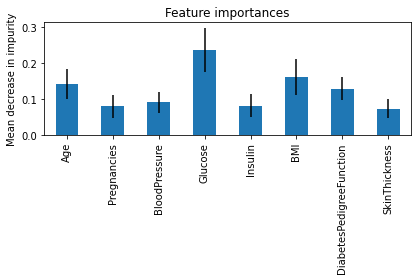

In [23]:
 # Bar plot for feature importance

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [26]:
# Compare 2 feature importance results 

FeatureImps2 = pd.Series(importances, index = feature_names).sort_values(ascending = False)
print("Feature importances by Random Forest")
display(FeatureImps2)

print("Feature importances by Logistic Regression")
display(FeatureImps1)

Feature importances by Random Forest


Glucose                     0.237819
BMI                         0.161634
Age                         0.143464
DiabetesPedigreeFunction    0.129189
BloodPressure               0.091507
Insulin                     0.082018
Pregnancies                 0.080054
SkinThickness               0.074315
dtype: float64

Feature importances by Logistic Regression


Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

## 3. Recursive Feature Elimination (RFE)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Using Logistic Regression to find 5 best features

model = LogisticRegression()
rfe = RFE(model, n_features_to_select = 5)
result = rfe.fit(train_X, train_y)
print("Feature Name", feature_names)
print("Num of Features", result.n_features_)
print("Selected Feature", result.support_)
print("Selected Feature", result.ranking_)

Feature Name ['Age', 'Pregnancies', 'BloodPressure', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness']
Num of Features 5
Selected Feature [ True  True False  True False  True  True False]
Selected Feature [1 1 2 1 3 1 1 4]


In [28]:
# Function to loop for 1-8 best features

def FindFeatureRankRFE(train_X, train_y, numBestFeature = 3):
  model = RandomForestClassifier(n_estimators= 100, random_state= 10)
  rfe = RFE(model, n_features_to_select = numBestFeature)
  result = rfe.fit(train_X, train_y)
  FeatureRank = result.ranking_
  return FeatureRank

print(feature_names)
for num in range(1, len(feature_names) + 1):
  FeatureRank = FindFeatureRankRFE(train_X, train_y, numBestFeature = num)
  print(f"Selecting {num} best feature using RFE is {FeatureRank}")

['Age', 'Pregnancies', 'BloodPressure', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness']
Selecting 1 best feature using RFE is [3 7 6 1 5 2 4 8]
Selecting 2 best feature using RFE is [2 6 5 1 4 1 3 7]
Selecting 3 best feature using RFE is [1 5 4 1 3 1 2 6]
Selecting 4 best feature using RFE is [1 4 3 1 2 1 1 5]
Selecting 5 best feature using RFE is [1 3 2 1 1 1 1 4]
Selecting 6 best feature using RFE is [1 2 1 1 1 1 1 3]
Selecting 7 best feature using RFE is [1 1 1 1 1 1 1 2]
Selecting 8 best feature using RFE is [1 1 1 1 1 1 1 1]


In [29]:
# Ranking list for 3rd approach

FeatureRank = FindFeatureRankRFE(train_X, train_y, numBestFeature = 1)
Importances = (len(FeatureRank) - FeatureRank + 1)/len(FeatureRank) # Reverse rank to importance
FeatureImps3 = pd.Series(Importances, index = feature_names).sort_values(ascending = False)
display(FeatureImps3)
print(type(FeatureImps3))  

Glucose                     1.000
BMI                         0.875
Age                         0.750
DiabetesPedigreeFunction    0.625
Insulin                     0.500
BloodPressure               0.375
Pregnancies                 0.250
SkinThickness               0.125
dtype: float64

<class 'pandas.core.series.Series'>
